<a href="https://colab.research.google.com/github/SnehaMohan2011/Stock_Price_Prediction_Model/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  #libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
df = pd.read_csv("/content/Minor Project Data set (Stock Price Prediction) (1).csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.shape

(1009, 7)

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


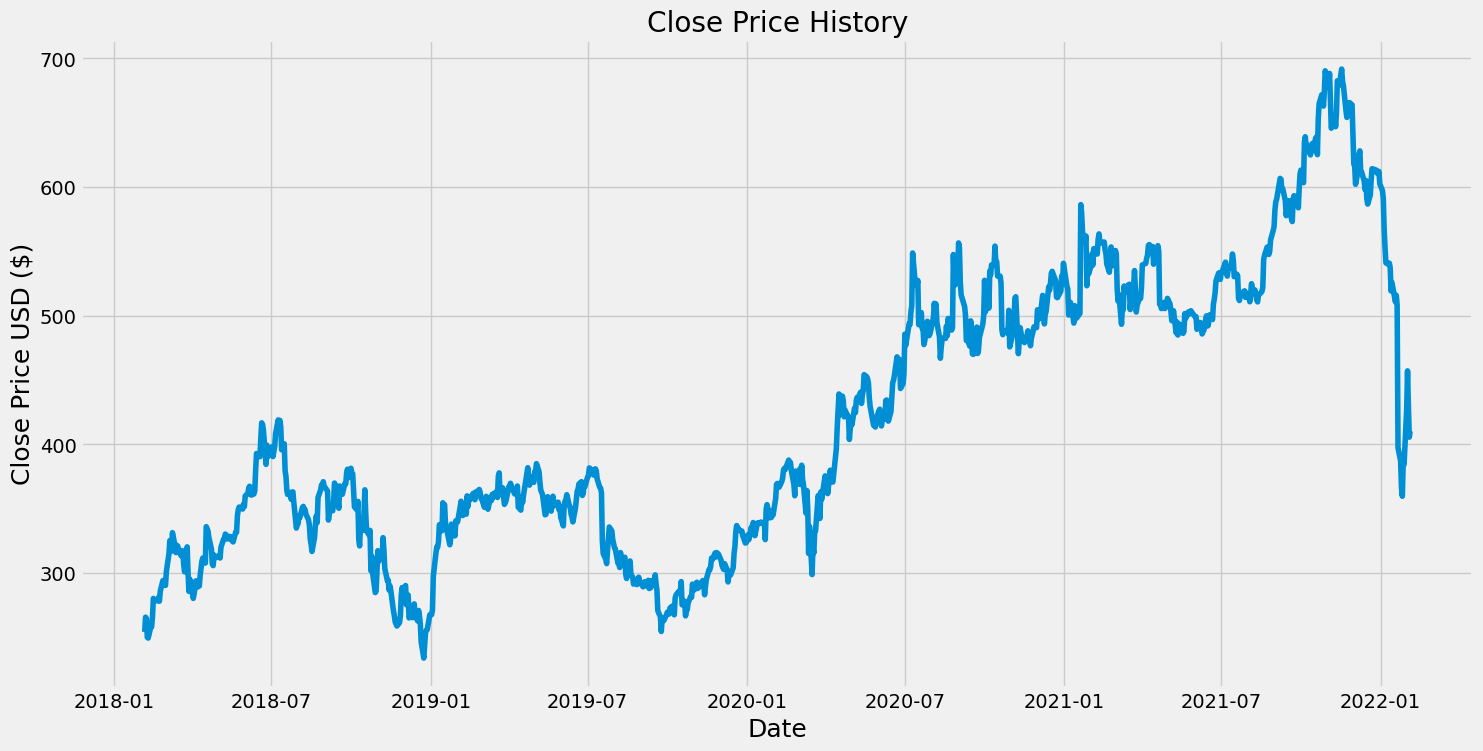

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2018-02-01'
df_filtered = df[df['Date'] >= start_date]

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df_filtered['Date'], df_filtered['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset =data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

808

In [ ]:
#scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
train_data= scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(748, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - loss: 0.0092


In [ ]:
#create testing
test_data = scaled_data[training_data_len -60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2 )

In [ ]:
target_range = np.max(y_test) - np.min(y_test)

In [ ]:

scaled_rmse = rmse / target_range
print(scaled_rmse)

0.00024421299358465525


<ipython-input-24-c96da766a14c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


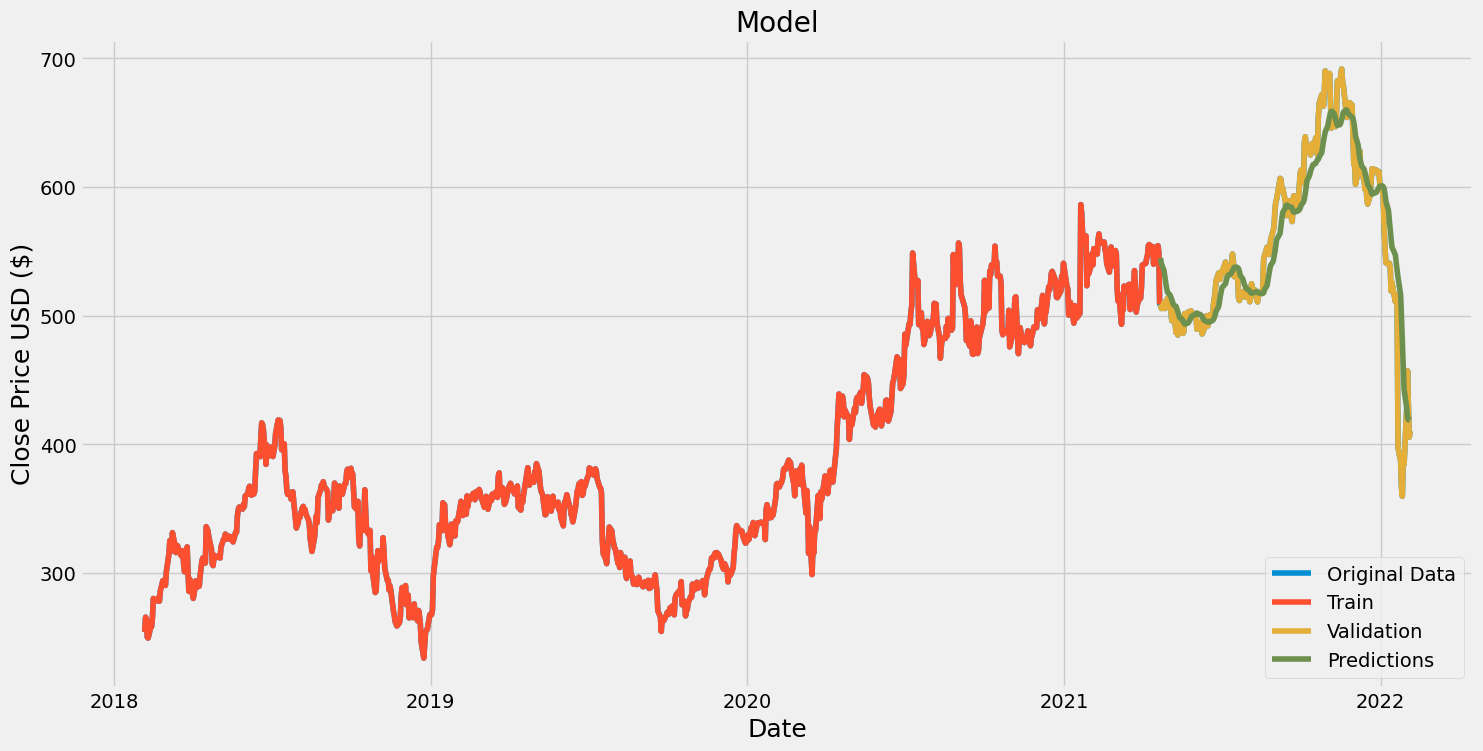

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

train = df[:training_data_len]
valid = df[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(df.index, df['Close'], label='Original Data')

plt.plot(train.index, train['Close'], label='Train')

plt.plot(valid.index, valid['Close'], label='Validation')
plt.plot(valid.index, valid['predictions'], label='Predictions')

plt.legend(loc='lower right')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In [ ]:
#predicted price
valid

,Open,High,Low,Close,Adj Close,Volume,predictions
Date,,,,,,,
2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100,544.770386
2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700,540.405762
2021-04-26,506.760010,510.480011,503.000000,510.299988,510.299988,4388800,535.219238
2021-04-27,512.619995,512.989990,504.579987,505.549988,505.549988,3761300,530.340637
2021-04-28,505.200012,508.399994,503.339996,506.519989,506.519989,3193000,525.637146
...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,428.548065
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,420.579132
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,419.053894


In [ ]:
d = pd.read_csv("/content/Minor Project Data set (Stock Price Prediction) (1).csv")

new_df=d.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[418.65994]]


In [ ]:
d2 = pd.read_csv("/content/Minor Project Data set (Stock Price Prediction) (1).csv")
d2['Date'] = pd.to_datetime(d2['Date'])

model = LinearRegression()
model.fit(d2[['Open', 'High', 'Low', 'Volume']], d2['Close'])

d2['predictions'] = model.predict(d2[['Open', 'High', 'Low', 'Volume']])
print(d2[['Date', 'predictions']])


           Date  predictions
0    2018-02-05   257.519015
1    2018-02-06   261.044194
2    2018-02-07   269.856236
3    2018-02-08   254.013733
4    2018-02-09   241.983159
...         ...          ...
1004 2022-01-31   420.438035
1005 2022-02-01   448.500213
1006 2022-02-02   434.396620
1007 2022-02-03   414.137202
1008 2022-02-04   403.346705

[1009 rows x 2 columns]


In [ ]:
d2 = pd.read_csv("/content/Minor Project Data set (Stock Price Prediction) (1).csv")
print(d2['Close'])

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64


In [ ]:
# Display the final analysis
final_analysis = valid.reset_index()[['Date', 'Close']]
final_analysis.set_index('Date', inplace=True)
final_analysis.columns = ['Close']
print(final_analysis)


                 Close
Date                  
2021-04-22  508.779999
2021-04-23  505.549988
2021-04-26  510.299988
2021-04-27  505.549988
2021-04-28  506.519989
...                ...
2022-01-31  427.140015
2022-02-01  457.130005
2022-02-02  429.480011
2022-02-03  405.600006
2022-02-04  410.170013

[201 rows x 1 columns]
